# IRIS-DATASET

##   Iris dataset contains:

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [109]:
data=pd.read_csv('/home/mohan/Downloads/Iris.csv')
data=data.drop('Id',axis=1)

In [110]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


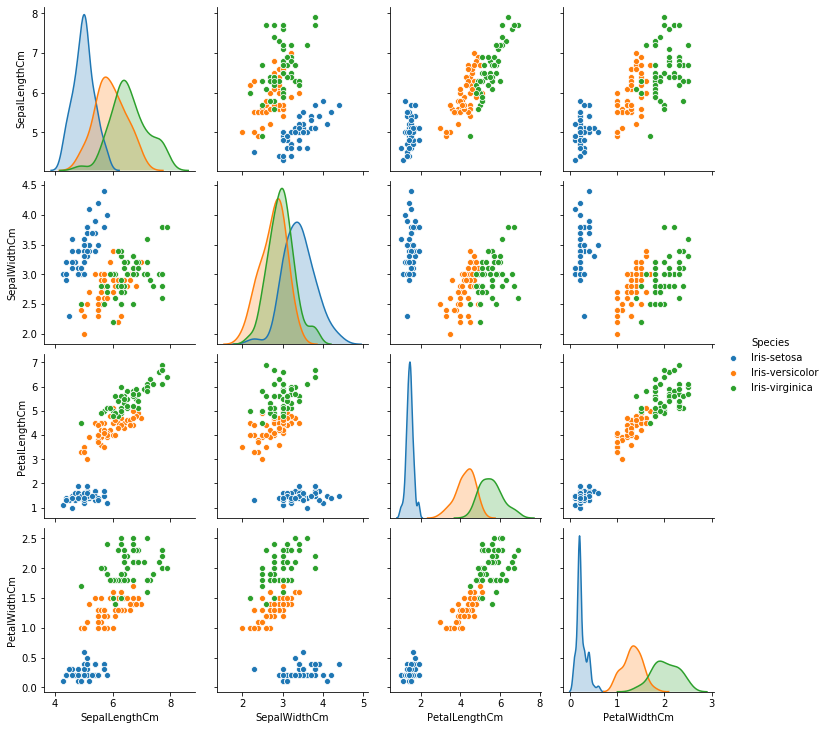

In [111]:
sns.pairplot(data,hue='Species')

In [103]:
target=data['Species']
data=data.drop('Species',axis=1)

In [104]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
target.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [77]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

# Split the Data into Train,validation and Test

In [79]:
from sklearn.model_selection import train_test_split

x,x_test,y,y_test =train_test_split(data,target,test_size=0.2,random_state=42)

In [80]:
x_train,x_valid,y_train,y_valid =train_test_split(x,y,test_size=0.2,random_state=42)

# HyperTuning Parameters:

In [82]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
train_auc = []
cv_auc = []
max_depths =[1,5,10,50]
min_samples_splits = [5,10,100,500]
for i in tqdm(max_depths):
    p=[]
    q=[]
    for j in tqdm(min_samples_splits):
        clf =  DecisionTreeClassifier(max_depth=i,min_samples_split=j)
        clf.fit(x_train, y_train)
        y_train_pred = clf.predict(x_train)    
        y_cv_pred = clf.predict(x_valid) 
        p.append(accuracy_score(y_train,y_train_pred))
        q.append(accuracy_score(y_valid, y_cv_pred))
    train_auc.append(p)
    cv_auc.append(q)


100%|██████████| 4/4 [00:00<00:00, 321.94it/s]

100%|██████████| 4/4 [00:00<00:00, 276.88it/s]

100%|██████████| 4/4 [00:00<00:00, 261.59it/s]

100%|██████████| 4/4 [00:00<00:00, 54.91it/s]


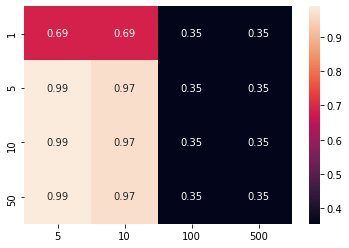

In [83]:
sns.heatmap(train_auc,annot=True,fmt='.2f',yticklabels=['1','5','10','50'],xticklabels=['5','10','100','500'])

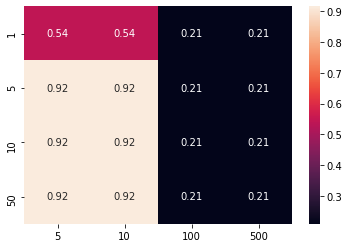

In [84]:
sns.heatmap(cv_auc,annot=True,fmt='.2f',yticklabels=['1','5','10','50'],xticklabels=['5','10','100','500'])

# Max_depth=5 and Min_sample_split=5 are best parameters:

In [85]:
best_model =  DecisionTreeClassifier(max_depth=5,min_samples_split=5)

In [86]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Train Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix

y_predict=best_model.predict(x_train)
con=confusion_matrix(y_train,y_predict)


In [92]:
df=pd.DataFrame(data=con,index=['Iris-setosa','Iris-virginica','Iris-versicolor'],columns=['Iris-setosa','Iris-virginica','Iris-versicolor'])


Text(33.0, 0.5, 'actual value')

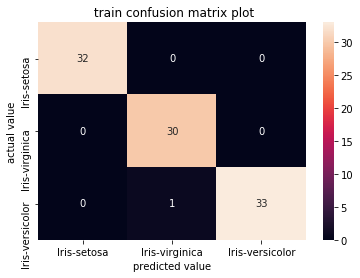

In [93]:
import seaborn as sns
sns.heatmap(df,fmt='d',annot=True)
plt.title(' train confusion matrix plot')
plt.xlabel('predicted value')
plt.ylabel('actual value')

# Validation Confusion Matrix

Text(33.0, 0.5, 'actual value')

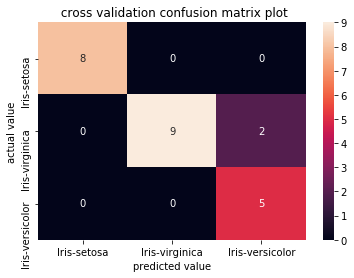

In [94]:
y_predict=best_model.predict(x_valid)
con=confusion_matrix(y_valid,y_predict)

df=pd.DataFrame(data=con,index=['Iris-setosa','Iris-virginica','Iris-versicolor'],columns=['Iris-setosa','Iris-virginica','Iris-versicolor'])


import seaborn as sns
sns.heatmap(df,fmt='d',annot=True)
plt.title(' cross validation confusion matrix plot')
plt.xlabel('predicted value')
plt.ylabel('actual value')

# Test Confusion Matrix

Text(33.0, 0.5, 'actual value')

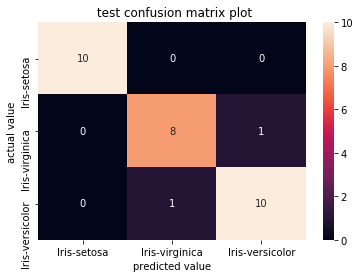

In [95]:
y_predict=best_model.predict(x_test)
con=confusion_matrix(y_test,y_predict)

df=pd.DataFrame(data=con,index=['Iris-setosa','Iris-virginica','Iris-versicolor'],columns=['Iris-setosa','Iris-virginica','Iris-versicolor'])


import seaborn as sns
sns.heatmap(df,fmt='d',annot=True)
plt.title(' test confusion matrix plot')
plt.xlabel('predicted value')
plt.ylabel('actual value')

Accuracy of test_data:

In [97]:
accuracy=accuracy_score(y_test,y_predict)
print('test accuarcy of iris dataset--->>> '+str(accuracy))

test accuarcy of iris dataset--->>> 0.9333333333333333


In [112]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# visualize the Decision Tree 

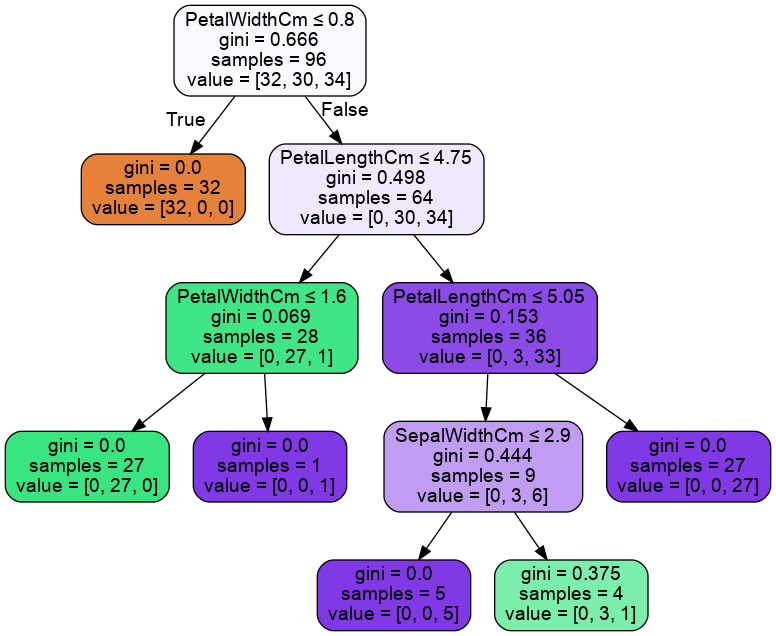

In [114]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(best_model, out_file=dot_data, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Saving the model using pickle library:

In [99]:
import pickle

filename = 'finalized_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))